<a href="https://colab.research.google.com/github/Ushamenda23/calculTE/blob/main/calories_bgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
calories=pd.read_csv('/content/calories.csv')

In [ ]:
calories.head()

,User_ID,Calories
0,14733363,231
1,14861698,66
2,11179863,26
3,16180408,71
4,17771927,35


In [ ]:
calories.tail()

,User_ID,Calories
14995,15644082,45
14996,17212577,23
14997,17271188,75
14998,18643037,11
14999,11751526,98


In [ ]:
excercise=pd.read_csv('/content/exercise.csv')

In [ ]:
excercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190,94,29,105,40.8
1,14861698,female,20,166,60,14,94,40.3
2,11179863,male,69,179,79,5,88,38.7
3,16180408,female,34,179,71,13,100,40.5
4,17771927,female,27,154,58,10,81,39.8


In [ ]:
excercise.tail()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
14995,15644082,female,20,193,86,11,92,40.4
14996,17212577,female,27,165,65,6,85,39.2
14997,17271188,female,43,159,58,16,90,40.1
14998,18643037,male,78,193,97,2,84,38.3
14999,11751526,male,63,173,79,18,92,40.5


In [ ]:
calories=pd.concat([excercise,calories['Calories']],axis=1)

In [ ]:
calories.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


In [ ]:
calories.shape

(15000, 9)

In [ ]:
calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
calories.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [ ]:
calories.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


data visualization

In [ ]:
sns.set()

#plotting the gender columns

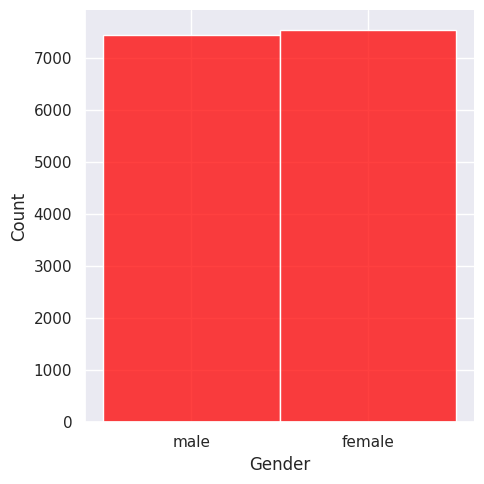

In [ ]:
sns.displot(calories['Gender'],color='red')

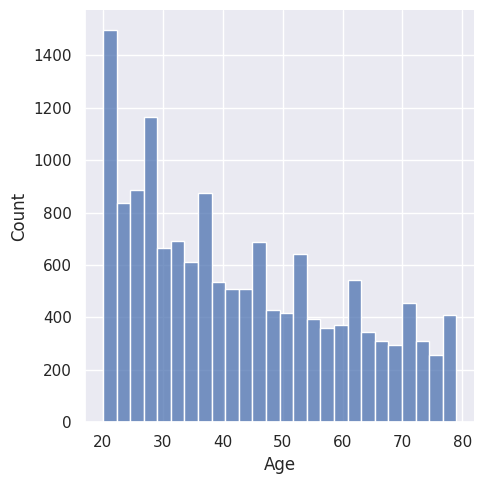

In [ ]:
sns.displot(calories['Age'])

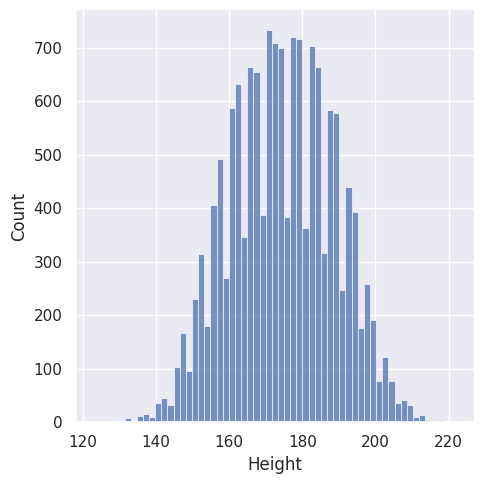

In [ ]:
sns.displot(calories['Height'])

In [ ]:
correlation=calories.corr()

<ipython-input-19-c4c0cd184caa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=calories.corr()


ValueError: ignored

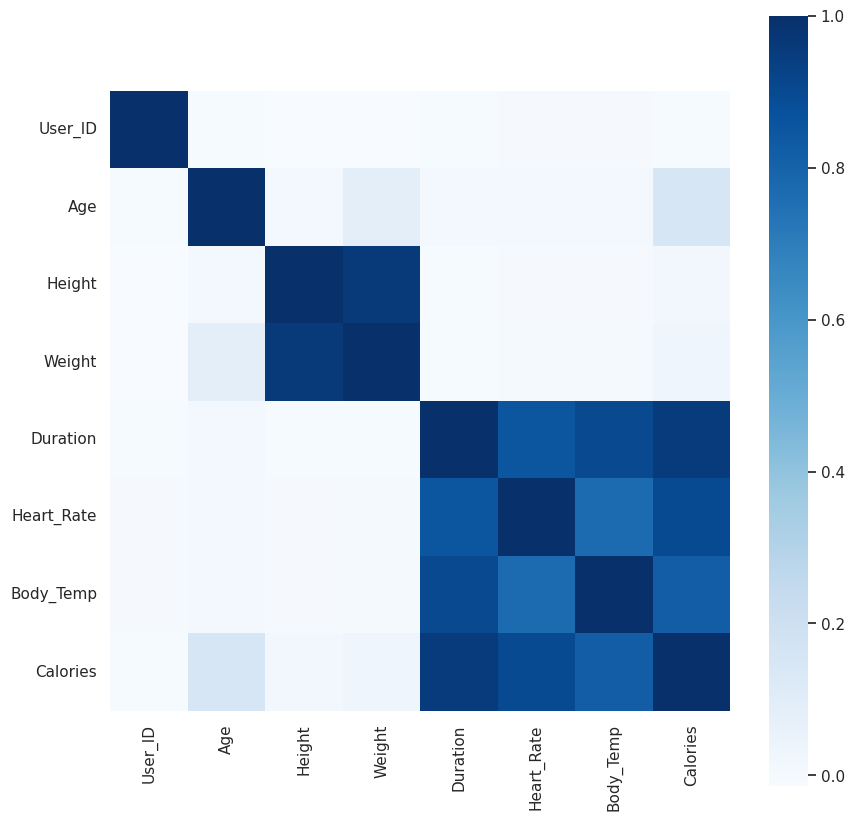

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size:8'
},cmap='Blues')

converting the text ro numerical daata

In [ ]:
calories.replace({"Gender":{'male':0,'female':1}},inplace=True)

In [ ]:
calories.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190,94,29,105,40.8,231
1,14861698,1,20,166,60,14,94,40.3,66
2,11179863,0,69,179,79,5,88,38.7,26
3,16180408,1,34,179,71,13,100,40.5,71
4,17771927,1,27,154,58,10,81,39.8,35


In [ ]:
x=calories.drop(columns=['User_ID','Calories'],axis=1)
y=calories['Calories']

In [ ]:
print(x)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68     190      94        29         105       40.8
1           1   20     166      60        14          94       40.3
2           0   69     179      79         5          88       38.7
3           1   34     179      71        13         100       40.5
4           1   27     154      58        10          81       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20     193      86        11          92       40.4
14996       1   27     165      65         6          85       39.2
14997       1   43     159      58        16          90       40.1
14998       0   78     193      97         2          84       38.3
14999       0   63     173      79        18          92       40.5

[15000 rows x 7 columns]


In [ ]:
print(y)

0        231
1         66
2         26
3         71
4         35
        ... 
14995     45
14996     23
14997     75
14998     11
14999     98
Name: Calories, Length: 15000, dtype: int64


splitting data into train and testing

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)


In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(15000, 7) (12000, 7) (3000, 7)


model training

In [ ]:
model=XGBRegressor()

In [ ]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

prediction on test data

In [ ]:
test_data_prediction=model.predict(x_test)

In [ ]:
print(test_data_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


In [ ]:
mae=metrics.mean_absolute_error(y_test,test_data_prediction)

In [ ]:
print("mean absolute error=",mae)

mean absolute error= 1.4833678883314132
